# Numpy - kontynuacja

In [1]:
import numpy as np

## Fancy indexing

Na początek wczytamy dane o pogodzie w Seattle w 2014 roku. Wykorzystamy do tego bibliotekę Pandas, bo ma ona bardzo dobre wsparcie dla plików CSV, a można z niej łatwo przejść już po wczytaniu danych do czystego Numpy'a.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/01/01,0.0,12.8,5.0,4.7,drizzle
1,2012/01/02,10.9,10.6,2.8,4.5,rain
2,2012/01/03,0.8,11.7,7.2,2.3,rain
3,2012/01/04,20.3,12.2,5.6,4.7,rain
4,2012/01/05,1.3,8.9,2.8,6.1,rain


In [4]:
cols = ["precipitation", "temp_max", "temp_min", "wind"]
arr = df[cols].values[:366, :]
print(arr)

[[ 0.  12.8  5.   4.7]
 [10.9 10.6  2.8  4.5]
 [ 0.8 11.7  7.2  2.3]
 ...
 [ 1.5  5.   3.3  1.7]
 [ 0.   4.4  0.   1.8]
 [ 0.   3.3 -1.1  2. ]]


### Zadanie 1

Ile było dni, w których ilość opadów (kolumna 0) była mniejsza niż średnia roczna?

In [16]:
precipitations = arr[:,0]
np.average(precipitations)
np.median(precipitations)
np.shape(precipitations[precipitations < np.average(precipitations)])

np.sum(precipitations < np.average(precipitations))

265

### Zadanie 2

Jakie były średnie temperatury (średnia z min i max, kolumny 1 i 2) każdego dnia?

In [29]:
arr[:,1:3].mean(axis=1)
np.mean(arr[:,1:3], axis=1)

array([ 8.9 ,  6.7 ,  9.45,  8.9 ,  5.85,  3.3 ,  5.  ,  6.4 ,  7.2 ,
        3.35,  2.5 ,  2.2 ,  1.1 ,  2.5 , -1.1 , -0.55,  1.65, -1.4 ,
       -1.95,  3.05,  5.8 ,  4.45,  4.7 ,  6.1 ,  6.65,  5.  ,  2.25,
        3.65,  6.65,  7.2 ,  7.75,  6.1 ,  5.  ,  8.3 , 10.3 ,  7.8 ,
        8.9 , 11.7 ,  7.5 ,  9.45,  9.75,  7.25,  6.65,  5.8 ,  3.9 ,
        3.9 ,  5.25,  7.2 ,  5.3 ,  4.45,  4.75,  8.9 ,  6.4 ,  5.55,
        5.55,  5.  ,  1.95,  2.25,  3.05,  3.05,  3.6 ,  5.3 ,  9.45,
        8.65,  4.45,  3.35,  3.6 ,  8.1 ,  7.2 ,  6.65,  4.75,  4.45,
        3.1 ,  4.45,  8.35,  6.4 ,  5.3 ,  2.2 ,  3.05,  5.  ,  5.  ,
        5.85,  6.4 ,  9.15,  7.75,  9.45, 10.55,  8.9 ,  8.05,  7.2 ,
        6.4 ,  6.65, 10.55,  7.5 ,  6.7 ,  6.1 ,  7.2 ,  8.9 , 14.15,
       13.05, 13.35,  9.15,  9.75,  9.45,  9.45, 11.65, 10.  ,  7.2 ,
       10.25,  9.45, 10.  , 12.2 , 15.8 , 15.3 , 11.95, 12.8 , 10.3 ,
        9.7 , 12.2 , 12.25, 10.  ,  8.9 ,  9.45,  9.15,  9.15,  9.15,
       11.4 , 15.  ,

### Zadanie 3

Jaka była siła wiatru w dniach, w których opady były wyższe od średniej, a jaka w dniach, w których opady były niższe od średniej?

In [38]:
mask = arr[:,0] > np.mean(arr[:,0])
higher = arr[mask,3].mean()
lower = arr[~mask,3].mean()

print(higher)
print(lower)

3.989108910891088
3.1766037735849055


### Zadanie 4

Usuń z macierzy te wiersze, które mają wartość `temp_max` (kolumna 1) większą lub równą 95% największej wartości `temp_max` lub mają wartość `temp_min` (kolumna 2) mniejszą lub równą 95% najmniejszej wartości `temp_min`. Do usuwania użyj funkcji `np.delete()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.delete.html)).

Następnie policz średnią temperaturę (jak w zadaniu 2) z tak przetworzonych danych. Taka średnia nazywa się średnią ucinaną (truncated mean) i jest bardziej odporna na ekstremalne wartości (outliery).

## Broadcasting

### Zadanie 5

Stwórz macierz kształtu `(6, 4)`, w której każdy wiersz to `[1, 2, 3, 4]`. Wykorzystaj broadcasting, przyda się też `np.arange()`.

In [3]:
np.arange(1,5) * np.ones((6,1))

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

### Zadanie 6

Uzupełnij kod funkcji `standardize_cols()`, która standaryzuje kolumny macierzy. Jest to odjęcie średniej i podzielenie przez odchylenie standardowe poszczególnych kolumn. Transformuje to liczby do tzw. Z-scores (stąd alternatywna nazwa Z-score normalization):

$$x' = \frac{x - \bar{x}}{\sigma}$$

Jest to częsta operacja w statystyce i uczeniu maszynowym, bo gwarantuje to wycentrowanie danych wokół środka układu współrzędnych i wariancję o tym samym rzędzie wielkości. Wiele algorytmów uczenia maszynowego wymaga takiej transformacji danych dla poprawnego działania, albo daje o wiele bardziej zrozumiałe wyniki po zastosowaniu takiej operacji.

Wykorzystaj tutaj broadcasting, żeby uniknąć używania pętli.

In [15]:
def standardize_cols(M):
    M = ( M - np.mean(M, axis=0) ) / np.std(M, axis=0)
    return M

X = np.random.randint(-20, 30, (10, 5))
print(X)
X = standardize_cols(X)
X

[[ 16  19 -19  21  20]
 [ 16  18   3  -3  -7]
 [-19  11  27   1  20]
 [  8   5  -5 -17  -8]
 [-10  22  -9  27 -13]
 [  8  -6 -18  16  -7]
 [-18   6  25 -14  22]
 [ 24  12 -14  15   6]
 [ -3  -1  17  10  15]
 [ 10  29  16   7  29]]


array([[ 0.90338188,  0.73175085, -1.26345543,  1.06698371,  0.84395178],
       [ 0.90338188,  0.63418407,  0.04152201, -0.67503051, -1.00862529],
       [-1.56680295, -0.04878339,  1.46513376, -0.38469481,  0.84395178],
       [ 0.33876821, -0.63418407, -0.43301524, -1.69120548, -1.07723926],
       [-0.93161257,  1.02445119, -0.67028387,  1.50248727, -1.42030909],
       [ 0.33876821, -1.70741865, -1.20413827,  0.70406408, -1.00862529],
       [-1.49622624, -0.53661729,  1.34649945, -1.4734537 ,  0.98117971],
       [ 1.46799556,  0.04878339, -0.96686965,  0.63148016, -0.11664374],
       [-0.4375756 , -1.21958475,  0.8719622 ,  0.26856053,  0.50088195],
       [ 0.47992162,  1.70741865,  0.81264504,  0.05080875,  1.46147747]])

### Zadanie 7

Stwórz losowy punkt z przestrzeni 10-wymiarowej oraz tablicę 100 losowych punktów z przestrzeni 10-wymiarowej. Następnie uzupełnij kod funkcji `get_closest_points()`, która przyjmuje tablicę, punkt i zwraca k najbliższych punktów z tej tablicy. Jako odległość przyjmij typową odległość euklidesową, tzn. $d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$.

Może ci się przydać funkcja `np.argsort()`, która zwraca indeksy elementów od najbliższego do najdalszego. Przykładowo, dla tablicy `[5, 4, 1, 2, 0, 6]` ta funkcja zwróci `[4, 2, 3, 1, 0, 5]`, bo najmniejszy element `0` jest pod indeksem `4`, drugi najmniejszy element `1` jest pod indeksem `2` itd.

In [59]:
point = np.random.uniform(-10, 10, 10)
X = np.random.uniform(-10, 10, (100, 10))
pass

In [60]:
def get_closest_points(X, point, k=1):
    distances = np.linalg.norm(X - point, axis=1)
    indices = np.argsort(distances)
    return X[indices[:k]]

print(get_closest_points(X, point, 3))


[[ 4.35873533  2.13307767 -7.72373099  5.72835431  3.2872164  -5.16410543
   6.50543702 -1.53564091 -2.94351445  3.76320512]
 [ 3.79641013 -9.22487142  4.4984157   4.51517086 -0.83681103  0.32138531
   7.30304806 -5.55932397 -2.77957033  8.15598098]
 [-0.17380065  7.42407743  9.35790705  3.19798697  0.93407396 -2.35355664
   4.44356381 -7.88397569 -1.80960059  3.01464486]]


## Reshaping

### Zadanie 8

Poniżej znajduje się kod ściągający zbiór MNIST z obrazami ręcznie pisanych cyfr. Większość algorytmów uczenia maszynowego (z ważnym wyjątkiem konwolucyjnych sieci neuronowych) nie potrafi pracować na danych obrazowych, tylko na wektorach 1D. Zamień kształt zbioru treningowego tak, aby miał 60000 przykładów będących wektorami 1D.

Użyj poniższych gotowych kawałków kodu, żeby zainstalować bibliotekę pomocniczą `mnist` oraz ściągnąć zbiór danych. Za pierwszym razem ściąganie może zająć chwilę.

In [61]:
!pip install mnist

In [63]:
import mnist

mnist.datasets_url = 'https://storage.googleapis.com/cvdf-datasets/mnist/'

digits = mnist.train_images()
print(digits.shape)

(60000, 28, 28)


In [70]:
x = digits.reshape(digits.shape[0], digits.shape[1] * digits.shape[2])
print(x.shape)

(60000, 784)


### Zadanie 9

Uzupełnij kod funkcji `imgs_rgb_to_gray()`, która zamienia zbiór obrazów RBG (tensor 4D: n_samples, height, width, channels) na obrazy w skali szarości (tensor 3D: n_samples, height, width) za pomocą prostej średniej, tzn. wartość w skali szarości to średnia z 3 kanałów R, G i B. Zadbaj o to, żeby wyjście funkcji miało odpowiedni kształt (liczbę wymiarów).

Podpowiedź: funkcja `np.mean()` ma parametr `axis`, użyj też odpowiedniej funkcji

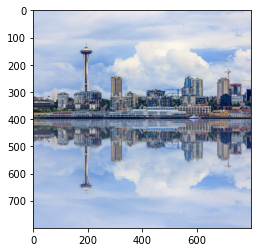

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
imgs = np.array([np.array(Image.open("img1.jpg")), np.array(Image.open("img2.jpg"))])
#imgs = np.array(Image.open("img1.jpg"))
plt.imshow(imgs[0], cmap='gray')
#plt.imshow(imgs[1], cmap='gray')
#imgs.shape

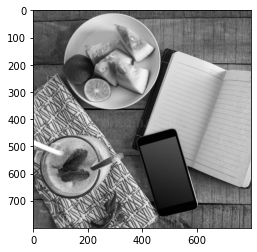

In [11]:
def imgs_rgb_to_gray(imgs):
    return np.mean(imgs, axis=3, dtype='int64')
    

mono = imgs_rgb_to_gray(imgs)
plt.imshow(mono[1], cmap='gray')

### Zadanie 10

Uzupełnij kod funkcji `normalize_rows()`, która normalizuje wektory-wiersze w macierzy 2D, tzn. dzieli je przez ich długość. Wykorzystaj funkcję `np.linalg.norm()`. Da się to zrobić w 1 linijkę!

In [12]:
from numpy.linalg import norm

In [17]:
def normalize_rows(matrix):
    return matrix / np.linalg.norm(matrix, axis=1)

M = np.random.uniform(0, 100, (10,10))
M = normalize_rows(M)
print(M)

[[0.14514607 0.23851974 0.21810273 0.28045383 0.12305803 0.67397417
  0.44374946 0.28880835 0.25964235 0.48380987]
 [0.14900119 0.66998338 0.09001346 0.08675182 0.15661634 0.18480258
  0.00222219 0.00464781 0.15551036 0.41262098]
 [0.46045982 0.44968624 0.28691021 0.37775654 0.40554761 0.46902401
  0.48928391 0.01996218 0.58945784 0.32252293]
 [0.47228667 0.03734881 0.38140028 0.25511209 0.42246588 0.36562749
  0.03929123 0.2579388  0.43287813 0.40148981]
 [0.37271809 0.70689111 0.02369104 0.19900537 0.08296887 0.61504834
  0.25903643 0.31941742 0.28684633 0.31613802]
 [0.2763947  0.3992743  0.02340444 0.28833868 0.27160779 0.39951931
  0.15658347 0.27755076 0.12994493 0.00159427]
 [0.2695607  0.38581689 0.17771938 0.43120448 0.02800791 0.45462073
  0.39311736 0.08129984 0.1758018  0.40824312]
 [0.43310792 0.58660776 0.25568032 0.29721378 0.45937929 0.6768367
  0.50007537 0.39218393 0.44839371 0.15958341]
 [0.13218504 0.51515204 0.22703803 0.16810113 0.06848837 0.64173135
  0.02293522 

## Łączenie i dzielenie tablic

### Zadanie 10

W zadaniach 1-4 pracowaliśmy z obserwacjami z 1 roku. Chcemy zrobić to samo dla każdego miesiąca oddzielnie.

Podziel macierz W tak, żeby dostać listę tablic, gdzie każdy kolejny obiekt reprezentuje oddzielny miesiąc. Znamy liczbę elementów dla każdego miesiąca.

Do tworzenia punktów podziału może przydać się funkcja `np.ufunc.accumulate()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.ufunc.accumulate.html)), w szczególności: `np.add.accumulate()`.

In [ ]:
W = df[cols].values[:366, :]

In [ ]:
days = (31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

### Zadanie 11

Mamy wielowymiarowy rozkład normalny $z$. Wiadomo, że $x$ i $y$ to zmienne losowe, rozkłady których są brzegowymi rozkładami $z$, przy czym jeśli $d(x)$ - zbiór wymiarów opisanych przez $x$ w stosunku do $z$, to $|d(x)| + |d(y)| = |d(z)|$ i $d(x) \cap d(y) = 0$. Innymi słowy, $x$ i $y$ opisują w sumie wszystkie wymiary i nie mają żadnego wspólnego.

Chcemy dostać macierz kowariancji rozkładu zmiennej losowej $z$, przy czym znamy macierze kowariancji $x$, $y$ oraz kowariancje pomiędzy poszczególnymi wymiarami $x$ i $y$.

Macierz kowariancji $z$ w takim przypadku wygląda następująco: 
$\begin{bmatrix}
    \Sigma_{xx}  & \Sigma_{xy} \\
    \Sigma_{yx}  & \Sigma_{yy} \\
\end{bmatrix}$. Wiadomo też, że $Cov(X, Y) = Cov(Y, X)$.

Wskazówka: `np.block()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.block.html#numpy.block)).

In [ ]:
Sigma_xx = np.array([[1,   1.4, 1.3],
                     [1.4, 21,  2.5],
                     [1.3, 2.5, 0.1]])

Sigma_yy = np.array([[143,  3.14],
                     [3.14, 9.48]])

Sigma_xy = np.array([[0.93, 11.3],
                     [94.3, 0.14],
                     [0.93, 122]])

### Zadanie 12

Często przy tworzeniu modeli ML zajmujemy się feature engineeringiem. Tworzymy w nim nowe cechy, które lepiej opisują nasz pożądany parametr. W praktyce oznacza to modyfikacje kolumn wejściowej macierzy.

W tym przypadku mamy zbiór California Housing, który opisuje ceny nieruchomości w Kalifornii dla różnych bloków z pewnymi podanymi parametrami. Ale mają one zbyt mały współczynnik korelacji z pożądanym parametrem, czyli **median_house_value**. Chcemy spróbować stworzyć inne cechy, które mogą być lepsze od już istniejących.

Stwórz cechy: **bedrooms_per_rooms**, **rooms_per_household** oraz **people_per_household**, dołącz do podanej macierzy i porównaj współczynniki korelacji. Czy dodane cechy lepiej opisują **median_house_value**?

In [ ]:
housing = pd.read_csv('housing.csv')
housing = housing.dropna()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing_cols = ['median_house_value', 'total_rooms', 'total_bedrooms', 
                'population', 'households']
V = housing[housing_cols].values

Stwórz cechy (**total_rooms** - 1 kolumna, **total_bedrooms** - 2, **population** - 3, **households** - 4)

In [ ]:
# bedrooms_per_room = ?

In [ ]:
# rooms_per_household = ?

In [ ]:
# people_per_household = ?

Dołącz do macierzy V

Policz współczynniki korelacji i porównaj wyniki. Ciekawi nas korelacja z kolumną 0.

Może przydać się funckja ```np.corrcoef()``` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html))

## Zapisywanie i wczytywanie macierzy

### Zadanie 13

Zapisz macierz `arr` używanej w zadaniach 1-3 do pliku `seattle.npy`.

### Zadanie 14

Wczytaj macierz `arr` zapisaną w poprzednim zadaniu do zmiennej `arr_loaded`. Upewnij się, że macierze są takie same za pomocą `np.allclose()` ([dokumentacja](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html)).

# Zadanie domowe

Jeżeli chcesz jeszcze poćwiczyć Numpy'a, to możesz w ramach zadania domowego przed następnymi ćwiczeniami wykonać niektóre (lub wszystkie) z poniższych ćwiczeń:
- [link 1](https://github.com/Kyubyong/numpy_exercises) - notebooki:
  - "2_Array_manipulation_routines.ipynb" - całość
  - "5_Input_and_Output.ipynb" - zadania do Q6 włącznie
  - "8_Logic_functions.ipynb" - całość
  - "9_Mathematical_functions.ipynb" - całość
- [link 5](https://bic-berkeley.github.io/psych-214-fall-2016/lab_01_exercise.html) - od części "Fancy indexing using boolean arrays" do końca
- [link 6](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.md) - zadania 25, 42, 45, 50, 54, 58, 60, 72, 94